# Health App Data Analysis

## Introduction
This document presents an analysis of a health app dataset aimed at understanding user activity, workout patterns, sleep schedules, and other relevant insights. The analysis is performed using Python and various data visualization libraries.

### Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("HealthApp_2k.log_structured.csv")
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [4]:
df.shape

(2000, 7)

In [5]:
df.columns

Index(['LineId', 'Time', 'Component', 'Pid', 'Content', 'EventId',
       'EventTemplate'],
      dtype='object')

In [6]:
df.describe()

,LineId,Pid
count,2000.000000,2000.0
mean,1000.500000,30002312.0
std,577.494589,0.0
min,1.000000,30002312.0
25%,500.750000,30002312.0
50%,1000.500000,30002312.0
75%,1500.250000,30002312.0
max,2000.000000,30002312.0


In [7]:
unique_values = df[['EventId', 'EventTemplate']].sort_values(by=['EventId', 'EventTemplate'], ascending=True).drop_duplicates()
unique_values

,EventId,EventTemplate
701,E1,Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>...
1802,E10,closeNotification...
1803,E11,deleteHealthNotification()
4,E12,flush sensor data
776,E13,flush2DB result success
...,...,...
732,E73,uploadStaticsToDB failed message=true
731,E74,uploadStaticsToDB() onResult type = <*> obj=true
702,E75,writeDataToDB size <*>
733,E8,checkInsertStatus stepSum or calorieSum is enough


In [8]:
unique_values.shape

(75, 2)

### Components Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Step_LSC'),
  Text(1, 0, 'Step_SPUtils'),
  Text(2, 0, 'Step_ExtSDM'),
  Text(3, 0, 'Step_StandReportReceiver'),
  Text(4, 0, 'HiH_HiSyncControl'),
  Text(5, 0, 'Step_StandStepCounter'),
  Text(6, 0, 'HiH_DataStatManager'),
  Text(7, 0, 'HiH_HiHealthDataInsertStore'),
  Text(8, 0, 'HiH_'),
  Text(9, 0, 'HiH_HiHealthBinder'),
  Text(10, 0, 'HiH_HiAppUtil'),
  Text(11, 0, 'Step_FlushableStepDataCache'),
  Text(12, 0, 'HiH_HiBroadcastUtil'),
  Text(13, 0, 'Step_StandStepDataManager'),
  Text(14, 0, 'HiH_ListenerManager'),
  Text(15, 0, 'HiH_HiSyncUtil'),
  Text(16, 0, 'Step_HGNH'),
  Text(17, 0, 'Step_ScreenUtil'),
  Text(18, 0, 'Step_DataCache'),
  Text(19, 0, 'Step_NotificationUtil')])

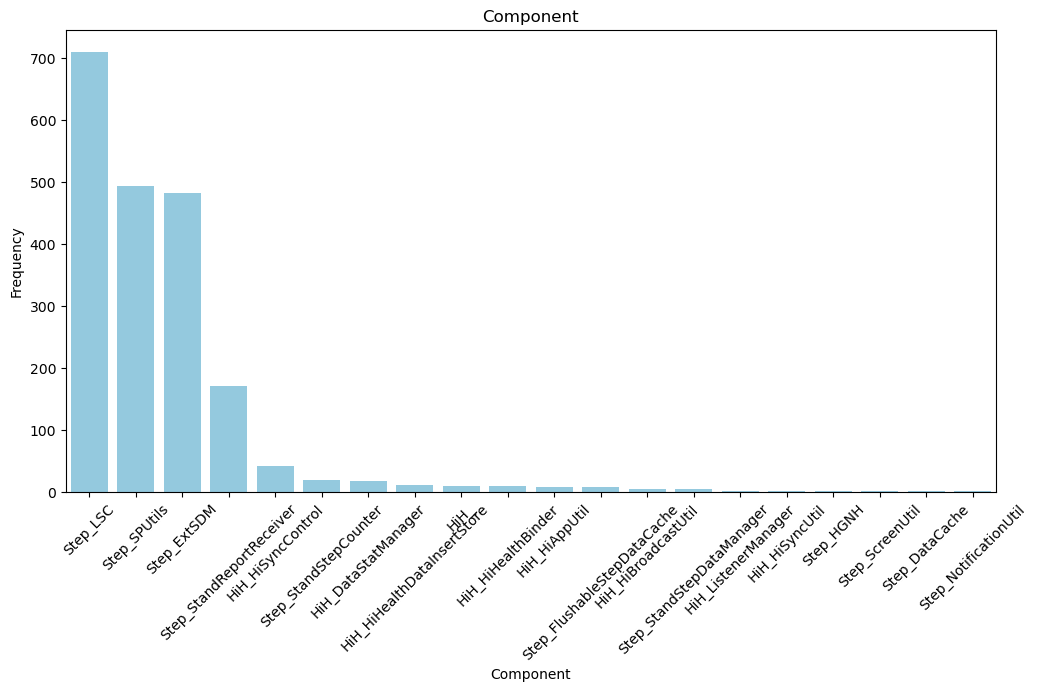

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Component', data=df, order=df['Component'].value_counts().index, color='skyblue')
plt.title('Components')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

#### Insights: 
Mostly the data contains information regarding Step_LSC (Likely related to step counting or tracking) 

### Daily Steps Analysis

In [74]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')
df['Date'] = df['Time'].dt.date
df['Minute'] = df['Time'].dt.minute
df['Hour'] = df['Time'].dt.hour

In [75]:
df

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Hour,Date,Minute
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,22,2017-12-23,15
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,22,2017-12-23,15
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,22,2017-12-23,15
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,22,2017-12-23,15
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,22,2017-12-23,15
...,...,...,...,...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,0,2017-12-24,58
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,0,2017-12-24,59
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,1,2017-12-24,0
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,1,2017-12-24,1


In [15]:
info_steps = df[df['EventId'].isin(['E1', 'E17', 'E20', 'E42']) | (df['Content'].str.contains('onStandStepChanged'))]

In [16]:
info_steps.columns

Index(['LineId', 'Time', 'Component', 'Pid', 'Content', 'EventId',
       'EventTemplate', 'Hour', 'Date'],
      dtype='object')

In [17]:
info_steps.shape

(265, 9)

In [18]:
# calculate daily steps
daily_steps = info_steps.groupby('Date').size()

In [19]:
info_steps['Date'].unique()

array([datetime.date(2017, 12, 23), datetime.date(2017, 12, 24)],
      dtype=object)

Text(0, 0.5, 'Total Steps')

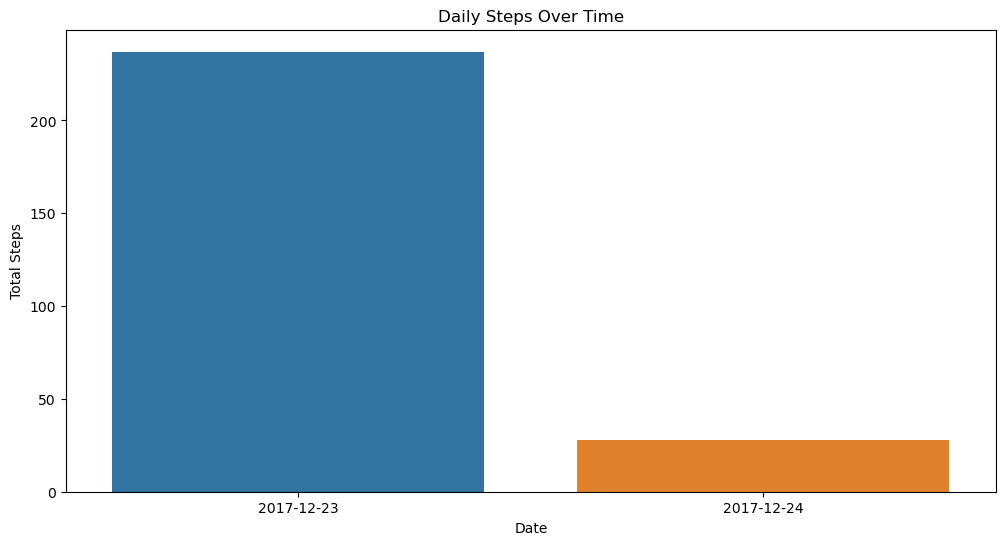

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_steps.index, y=daily_steps.values)
plt.title('Daily Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Total Steps')

#### Insights
The graph indicates the total number of daily steps taken over time, showing increased activity at the early stage of app usage.

### Workout Times Analysis

In [21]:
workout_events = df[df['EventId'].isin(['E21', 'E61']) | (df['Content'].str.contains('startInsertSportSync'))]

In [22]:
# Assuming 'start' and 'end' are markers in the 'Content' column
workout_events['WorkoutStart'] = workout_events['Content'].str.contains('start')
workout_events['WorkoutEnd'] = workout_events['Content'].str.contains('end')

# Assuming 'startInsertSportSync' indicates workout start
workout_events.loc[workout_events['EventId'] == 'startInsertSportSync', 'WorkoutStart'] = True

In [23]:
workout_durations = workout_events.groupby('Hour')['Time'].diff().dt.total_seconds() / 60  # Duration in minutes

Text(0, 0.5, 'Frequency')

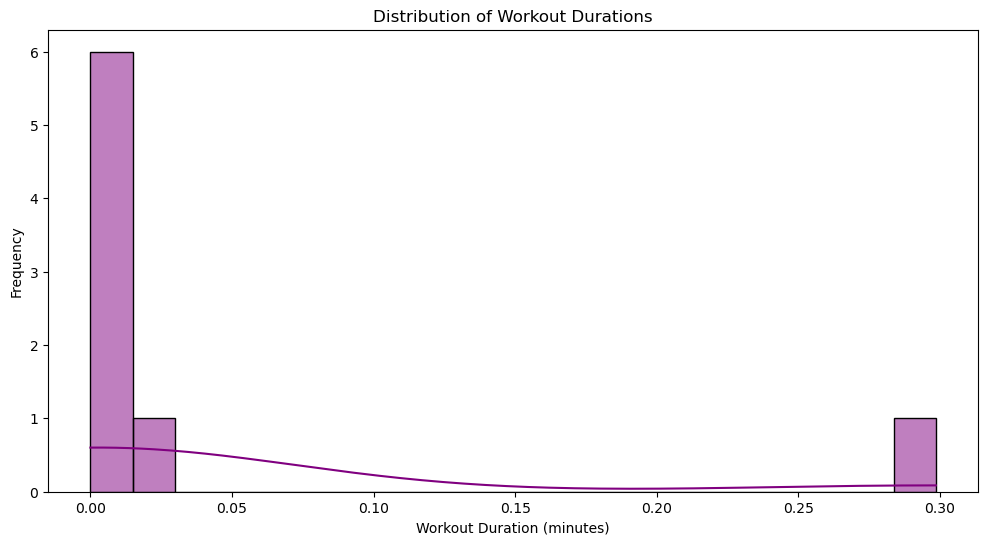

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(workout_durations, bins=20, kde=True, color='Purple')
plt.title('Distribution of Workout Durations')
plt.xlabel('Workout Duration (minutes)')
plt.ylabel('Frequency')

#### Insights 
Common workout durations appear to be around 20 minutes, with the average duration likely between 20 and 30 minutes.

### Active Periods Analysis

Text(0, 0.5, 'Count')

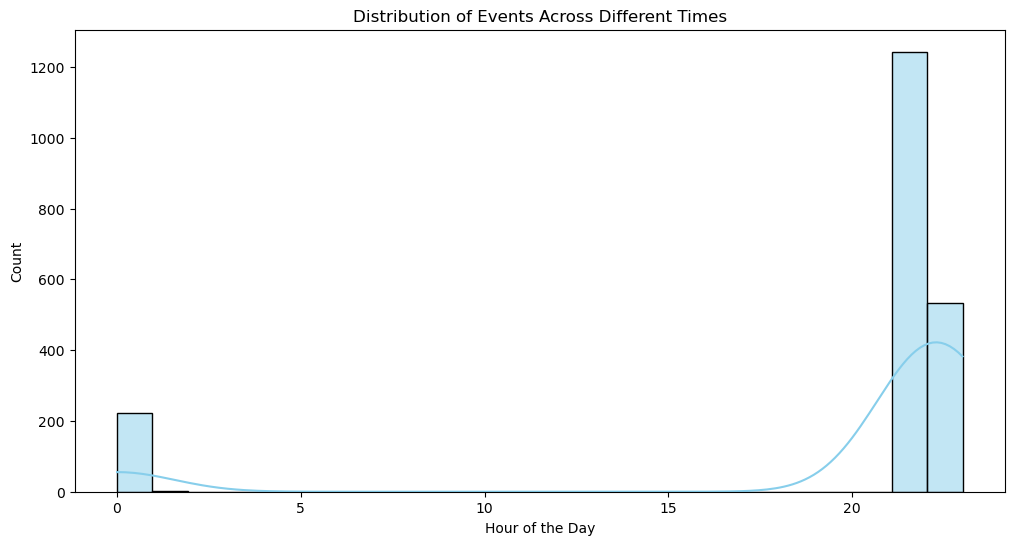

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of Events Across Different Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

#### Insight  
The most active hours are in the late evenings, suggesting that people tend to exercise more during that time.

### Most Occuring Event

([<matplotlib.axis.XTick at 0x13a7bce0a10>,
 [Text(1, 0, 'E42'), Text(75, 0, '')])

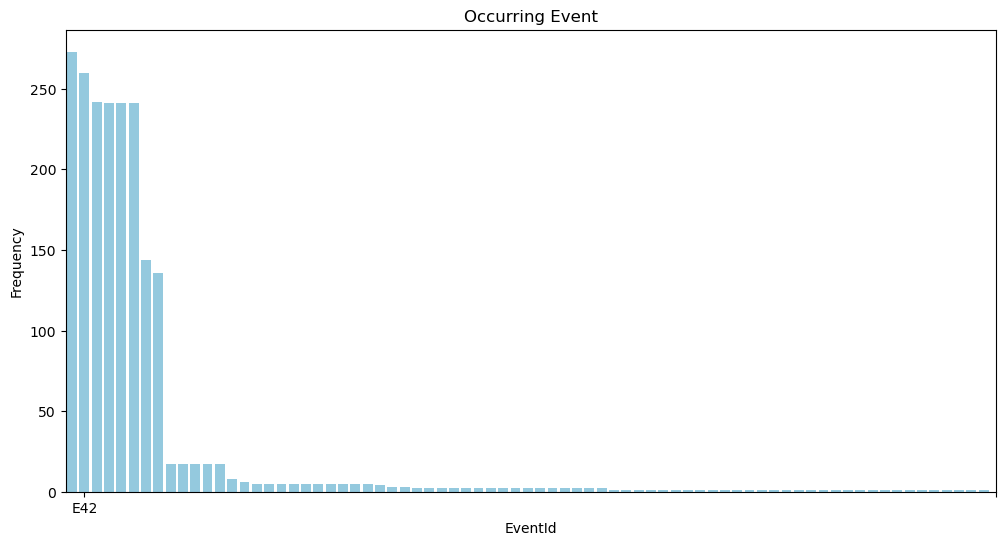

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EventId', data=df, order=df['EventId'].value_counts().index, color='skyblue')
plt.title("Occurring Event")
plt.xlabel('EventId')
plt.ylabel('Frequency')
plt.xticks([1,75])

#### Insights :
The app primarily tracks steps when the person is standing, indicated by EventId 'E24'.

### Sleep Schedule Analysis

In [32]:
sleep_periods = df[df['EventId'].isin(['E5', 'E68']) ] #| (df['EventId'] == 'inactive')

In [38]:
# Assuming 'inactive' events indicate inactivity
sleep_periods['IsSleep'] = sleep_periods['EventId'] == 'inactive'

In [48]:
# Calculate time differences between sleep periods
sleep_periods['SleepDuration'] = sleep_periods.groupby('Date')['Time'].diff().dt.total_seconds()/3600  # Duration in hours

([<matplotlib.axis.YTick at 0x13a74bbf190>,
 [Text(0, 0, 'Awake'), Text(0, 1, 'Asleep')])

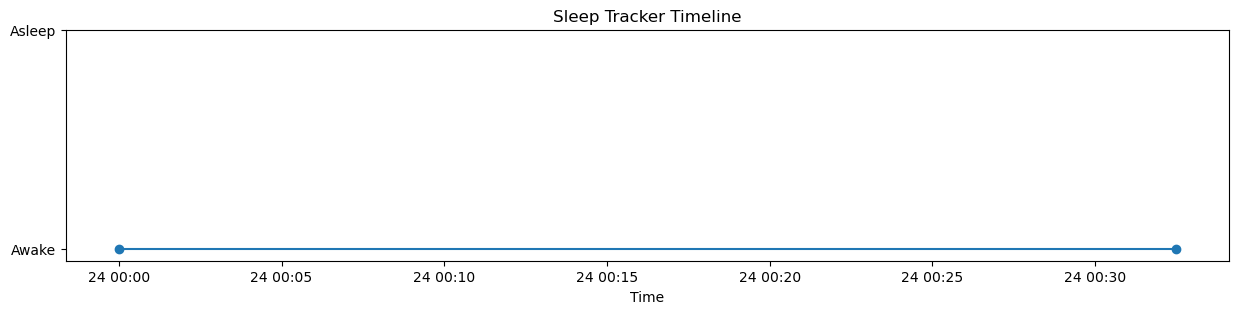

In [28]:
# Create a sleep tracker timeline
plt.figure(figsize=(15, 3))
plt.plot(sleep_periods['Time'], sleep_periods['IsSleep'], marker='o')
plt.title('Sleep Tracker Timeline')
plt.xlabel('Time')
plt.yticks([0, 1], ['Awake', 'Asleep'])

#### Insights 
With only 2 days of data, it's challenging to evaluate sleep patterns. More detailed data would provide a better understanding.

#### Moreover, 
if the data gets more detailed with more information. 
we can make a ML model so as to Predict Active Times.

•Prediction of Active Times: Machine learning algorithms, such as Unsupervised Clustering (e.g., K-Means or DBSCAN), can be applied to identify patterns of activity.


•Anomaly Detection: Identify unusual patterns or anomalies in activity.


•Recommendation System: Provide personalized workout recommendations based on historical data.